In [1]:
from torch_geometric.nn import GCNConv, SplineConv
from torch_geometric import seed_everything
import torch
import torch_geometric as pyg
import numpy as np

pos = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).astype(np.float32)
x = np.array([1, 2, 3, 4]).reshape(-1, 1).astype(np.float32)
edge_index = np.array([[0, 1], [1, 2], [2, 3], [3, 0]]).T

pos = torch.tensor(pos)
x = torch.tensor(x)
edge_index = torch.tensor(edge_index)
data = pyg.data.Data(x, edge_index, pos = pos)

data = pyg.transforms.Distance()(data)
data

Data(x=[4, 1], edge_index=[2, 4], pos=[4, 2], edge_attr=[4, 1])

### GCNs are rotation invariant

In [28]:
def rotate_graph(data, theta):
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    rot_pos = torch.tensor((R@data.pos[:,:2].numpy().T).T.astype(np.float32))

    rotated = pyg.data.Data(data.x, data.edge_index, pos = rot_pos)
    return rotated

In [3]:
seed_everything(0)
gc = GCNConv(1, 1)
gc(data.x, data.edge_index, data.edge_attr)

tensor([[2.4760],
        [1.4441],
        [2.3994],
        [3.2438]], grad_fn=<AddBackward0>)

In [4]:
rotated = rotate_graph(data, 30)
gc(rotated.x, rotated.edge_index, rotated.edge_attr)

tensor([[2.4760],
        [1.4441],
        [2.3994],
        [3.2438]], grad_fn=<AddBackward0>)

In [5]:
data = pyg.transforms.Cartesian(norm=True, cat=False)(data)

In [6]:
seed_everything(0)
sc = SplineConv(1, 1, 2, 5)

sc(data.x, data.edge_index, data.edge_attr)

/home/hussain/miniconda3/envs/tactile38/lib/python3.8/site-packages/torch_geometric/nn/conv/spline_conv.py:133: UserWarning: We do not recommend using the non-optimized CPU version of `SplineConv`. If possible, please move your data to GPU.
  warnings.warn(


tensor([[0.9901],
        [1.6638],
        [3.0486],
        [3.1803]], grad_fn=<AddBackward0>)

In [7]:
rotated = rotate_graph(data, 30)
sc(rotated.x, rotated.edge_index, rotated.edge_attr)

tensor([[1.1142],
        [1.8102],
        [2.7647],
        [3.6195]], grad_fn=<AddBackward0>)

In [94]:
from imports.TactileDataset import TactileDataset
from torch_geometric.loader import DataLoader

td = TactileDataset('/home/hussain/tactile/data/contact_extraction5/train/', )
dl = DataLoader(td, batch_size=20)
dl

In [106]:
it_sample = next(iter(dl))
it_sample

DataBatch(x=[31206, 1], edge_index=[2, 998592], y=[40], pos=[31206, 3], edge_attr=[998592, 3], batch=[31206], ptr=[21])

In [107]:
im_height=260
im_width=346

circle_center=(173, 130)

In [108]:
center_norm = (173 / im_width, 130/ im_height)
center_norm

(0.5, 0.5)

In [109]:
sample = td.get(10)
sample

Data(x=[1880, 1], edge_index=[2, 60160], y=[2], pos=[1880, 3], edge_attr=[60160, 3])

In [110]:
sample.pos[:,:2]

tensor([[0.5925, 0.5538],
        [0.2717, 0.5692],
        [0.6474, 0.5654],
        ...,
        [0.4480, 0.6923],
        [0.4422, 0.6885],
        [0.3121, 0.3885]])

In [111]:
def rotate_graph(data, theta):
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    rot_pos = torch.tensor((R@data.pos[:,:2].numpy().T).T.astype(np.float32))

    rotated = pyg.data.Data(data.x, data.edge_index, pos = rot_pos)
    return rotated

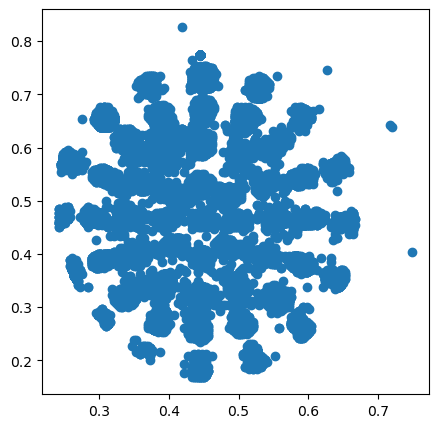

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(it_sample.pos[:, 0], it_sample.pos[:, 1])

In [113]:
centered = it_sample
centered.pos = it_sample.pos[:, :2] - torch.mean(it_sample.pos[:, :2], axis=0)

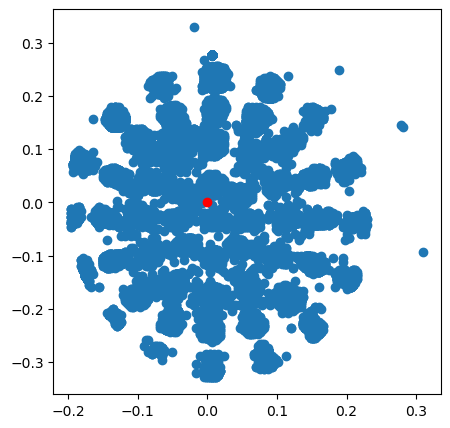

In [115]:
plt.figure(figsize=(5, 5))

plt.scatter(*centered.pos.T)
plt.scatter(*torch.mean(centered.pos[:, :2], axis=0), c='r')
#plt.scatter([0], [0], c='g')

In [117]:
torch.mean(centered.pos[:, :2], axis=0)

tensor([2.2248e-08, 4.9539e-08])

In [127]:
rot_sample = rotate_graph(centered, 45)
rot_sample

Data(x=[31206, 1], edge_index=[2, 998592], pos=[31206, 2])

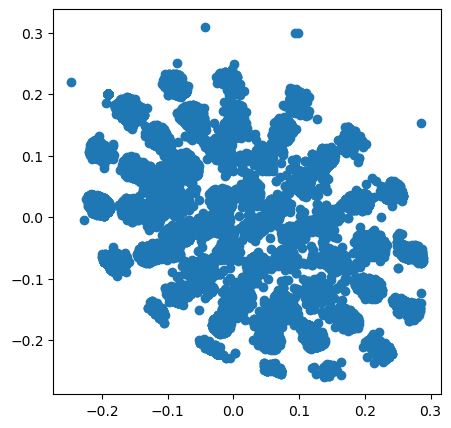

In [128]:
plt.figure(figsize=(5, 5))

plt.scatter(rot_sample.pos[:, 0], rot_sample.pos[:, 1])

In [11]:
from torch

tensor([[3.4104e-01, 3.3846e-01, 0.0000e+00],
        [5.0289e-01, 2.6923e-01, 5.9344e-05],
        [3.9884e-01, 3.5769e-01, 5.3409e-03],
        ...,
        [4.9711e-01, 5.1538e-01, 9.9656e-01],
        [5.7225e-01, 3.2308e-01, 9.9941e-01],
        [3.8728e-01, 6.4231e-01, 1.0000e+00]])

In [135]:
x = np.array([[1, 0], [0, 1], [-1, 0]])
theta = 90
theta = np.radians(theta)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

(R @ x.T).T

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17],
       [-6.123234e-17, -1.000000e+00]])

In [144]:
R

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [152]:
sample.y.numpy()

array([0.08776855, 0.03635493], dtype=float32)

In [153]:
np.array(list_of_rotations)[:, :2] - sample.y.numpy()

array([[-8.77685547e-02, -3.63549255e-02],
       [-7.16438150e-02, -2.96758396e-02],
       [-5.55190753e-02, -2.29967537e-02],
       [-3.93943354e-02, -1.63176678e-02],
       [-1.84775897e-02, -7.65366806e-03],
       [ 9.01072245e-10,  5.91218338e-10],
       [ 1.84775916e-02,  7.65366924e-03],
       [ 3.69551822e-02,  1.53073379e-02],
       [ 5.08133752e-02,  2.10475894e-02],
       [-7.54272132e-02, -2.40135840e-02],
       [-6.30858717e-02, -1.16722425e-02],
       [-5.07445302e-02,  6.69099030e-04],
       [-3.47355461e-02,  1.66780831e-02],
       [-2.05934105e-02,  3.08202187e-02],
       [-6.45127485e-03,  4.49623544e-02],
       [ 7.69086077e-03,  5.91044900e-02],
       [ 1.82974625e-02,  6.97110917e-02],
       [-8.10894688e-02, -2.02301858e-02],
       [-7.44103829e-02, -4.10544605e-03],
       [-6.77312970e-02,  1.20192938e-02],
       [-5.90672973e-02,  3.29360395e-02],
       [-5.14136286e-02,  5.14136301e-02],
       [-4.37599600e-02,  6.98912208e-02],
       [-3.

In [146]:
def updateContactStatus(list_of_current_contact_status, rotation_angle):
    theta = np.radians(rotation_angle)
    list_of_rotated_contact_status = []
    
    c, s = np.cos(theta), np.sin(theta)
    rot_mat = np.array([[c, -s], [s, c]])
    
    for contact_status in list_of_current_contact_status:
        if contact_status == 0:
            list_of_rotated_contact_status.append(0)
        else:
            current_rotation = list_of_rotations[int(contact_status)-1]
            rotated_contact_status = np.matmul(rot_mat, current_rotation[0:2])
            best_rot_diff = 100
            best_rot_idx = 1
            i = 1
            for rot in list_of_rotations:
                diff_vals = np.sqrt( np.power(rot[0] - rotated_contact_status[0], 2) +  np.power(rot[1] - rotated_contact_status[1], 2))
                if best_rot_diff > diff_vals:
                    best_rot_diff = diff_vals
                    best_rot_idx = i
                i = i + 1

            list_of_rotated_contact_status.append(best_rot_idx)


    return list_of_rotated_contact_status

In [147]:
possible_angle = [0.0174532925, 0.034906585, 0.0523598776, 0.075, 0.095, 0.115, 0.135, 0.15]#
N_examples = 17
list_of_rotations = [[0, 0, 0]]

for i in range(1, N_examples):
    theta = i * 2 * np.pi/(N_examples - 1)
    for phi in possible_angle:
        rx = phi * np.cos(theta)
        ry = phi * np.sin(theta)
        rotvec = [rx, ry, 0]
        list_of_rotations.append(rotvec)

In [148]:
updateContactStatus(sample.y, 90)

[33, 33]

In [155]:

theta = np.radians(90)
list_of_rotated_contact_status = []

c, s = np.cos(theta), np.sin(theta)
rot_mat = np.array([[c, -s], [s, c]])



array([0.08776855, 0.03635493], dtype=float32)

In [167]:
sample.y.numpy()

array([0.08776855, 0.03635493], dtype=float32)

In [170]:
rotated_contact_status = sample.y.numpy() #rot_mat @ sample.y.numpy()
rotated_contact_status

best_rot_diff = 100
best_rot_idx = 1
i = 1
for rot in list_of_rotations:
    diff_vals = np.sqrt( np.power(rot[0] - rotated_contact_status[0], 2) +  np.power(rot[1] - rotated_contact_status[1], 2))
    if best_rot_diff > diff_vals:
        best_rot_diff = diff_vals
        best_rot_idx = i
    i = i + 1
list_of_rotations[best_rot_idx-1]

[0.08776855558857224, 0.03635492607468353, 0]

In [162]:
	x	y
93834	-0.035865240052627416	-0.03597525083034619

[-0.044008594721985324, 0.10624614623879798, 0]

In [179]:
best_rot_diff = 100
best_rot_idx = 1
i = 1
x, y, z = -0.035865240052627416, -0.03597525083034619, -5.3156907365631555e-05
print(x, y, z)
for rot in list_of_rotations:
    diff_vals = np.sqrt(np.power(rot[0] - x, 2) +  np.power(rot[1] - y, 2) + np.power(rot[2] - z, 2))
    if best_rot_diff > diff_vals:
        best_rot_diff = diff_vals
        best_rot_idx = i
    i = i + 1

-0.035865240052627416 -0.03597525083034619 -5.3156907365631555e-05


In [180]:
list_of_rotations[best_rot_idx-1]

[-0.03702402451305762, -0.037024024513057606, 0]

In [182]:
best_rot_idx

76

In [183]:

cases_dict = {i+1: list_of_rotations[i][:2] for i in range(len(list_of_rotations))}
cases_dict[0] = [0, 0]

cases_dict[76]

[-0.03702402451305762, -0.037024024513057606]

In [3]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1],
                           [1, 0, 2]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [2]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [5]:
from torch_geometric.utils import to_dense_adj

to_dense_adj(data.edge_index)

tensor([[[0., 1., 0.],
         [1., 0., 1.],
         [0., 0., 0.]]])